In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import pandas as pd
import random

In [11]:
df = pd.read_csv("data/eil51.tsp.txt", skiprows=6, names=["id", "x", "y"], header=None, delimiter = ' ', index_col=0)

<AxesSubplot:xlabel='x', ylabel='y'>

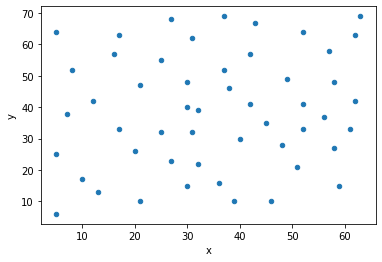

In [12]:
df.plot.scatter("x", "y")

In [13]:
# tidy data
df = df.sort_values("x").drop("EOF")

In [14]:
def get_distance(x1, y1, x2, y2) :
    return np.sqrt((x1-x2)**2 + abs(y1-y2)**2)

def total_distance(solution, df):
    distance = 0
    for i in range(len(solution)-1):
        fro = df.loc[solution[i]]
        to = df.loc[solution[i+1]]
        distance += get_distance(fro["x"], fro["y"], to["x"], to["y"])
    return distance

def plot_solution(solution, df):
    for i in range(len(solution)-1):
        fro = df.loc[solution[i]]
        to = df.loc[solution[i+1]]
        plt.arrow(fro["x"], fro["y"], to["x"]-fro["x"], to["y"]-fro["y"])

In [15]:
# find naive solution along 1 dimension
solution = []
for row in range(df.shape[0]-1):
    solution.append(df.iloc[row].name)
solution.append(df.iloc[0].name)

In [16]:
total_distance(solution, df)

1236.6260353475689

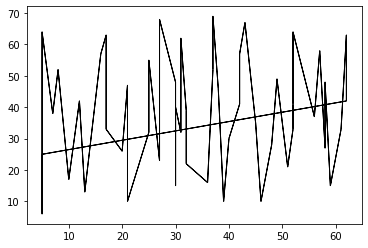

In [17]:
plot_solution(solution, df)

In [ ]:
# brute force
while True:
    random.shuffle(solution)
    if total_distance(solution, df) < 1200:
        break

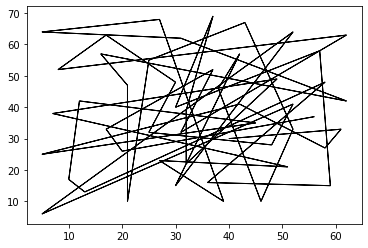

In [19]:
plot_solution(solution, df)